<a href="https://colab.research.google.com/github/sebagit914/Exam3_ML/blob/main/Assignment_3_Ml_SMOYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introducción

El presente proyecto, tiene como objetivo predecir si una sala de oficina está desocupada o no. En este caso, corresponde a un problema de clasificación binaria.

Los features corresponden a fecha, dióxido de carbono, luz, temperatura, humedad, índice de humedad y ocupación. 

* Temperatura en grados Celsius.
* Humedad relativa como porcentaje.
* Luz medida en lux.
* Dióxido de carbono medido en partes por millón.
* Relación de humedad.
* Humedad relativa medidas en kilogramos de vapor de agua por kilogramo de aire.
* Ocupación como 1 para ocupada o 0 para no ocupada.

Se desarrollarán 4 modelos de aprendizaje automático para predecir la ocupación,junto con la evaluación de la matriz de confusión para medir su precisión y GridSearchCV para la optimización de los hiperparámetros.

# 2 Importar librerías


In [ ]:
#DataFrame y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Entrenamiento y testeo
from sklearn.model_selection import train_test_split

#Metricas y preprocesamiento
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Optimizador Hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# 3 Montar Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4 Cargar base de datos


In [ ]:
filename = '/content/drive/MyDrive/Assigment/Assignment_3_ML_SMOYA/occupancy.csv'

df = pd.read_csv(filename)
df.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
#Establecemos la columna date como nuestro indice. Las observaciones se muestran ordenandas temporalmente.

In [ ]:
# Observamos las últimas filas del dataset
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8142,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [ ]:
#Utilizamos el atributo shape para conocer la estructura del dataframe
df.shape

(8143, 7)

In [ ]:
# Revisar si las columnas corresponden al diccionario de datos o existen espacios en el nombre
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [ ]:
#Revisamos la correspondencia al tipo de variable y contrastamos con el diccionario
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


# 5 Limpieza de datos

In [ ]:
df.dtypes.value_counts()

float64    5
object     1
int64      1
dtype: int64

In [ ]:
# Verificar que las columnas coincidan con el diccionario de datos señalado en el enunciado
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [ ]:
# Verificar valores nulos en DF
df.isna().sum().sort_values(ascending = False)

Occupancy        0
HumidityRatio    0
CO2              0
Light            0
Humidity         0
Temperature      0
date             0
dtype: int64

In [ ]:
# Revisión nulls
df.isna().any().sum()

0

# 6 EDA



## 5.1 Variables continuas

In [ ]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [ ]:
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


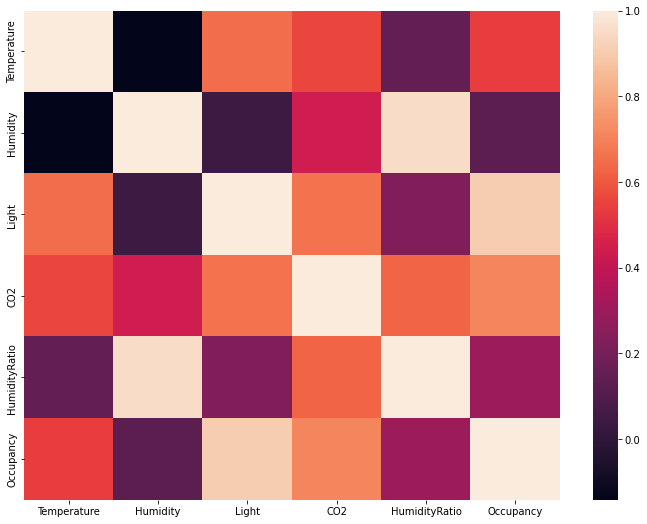

In [ ]:
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr())
plt.show()

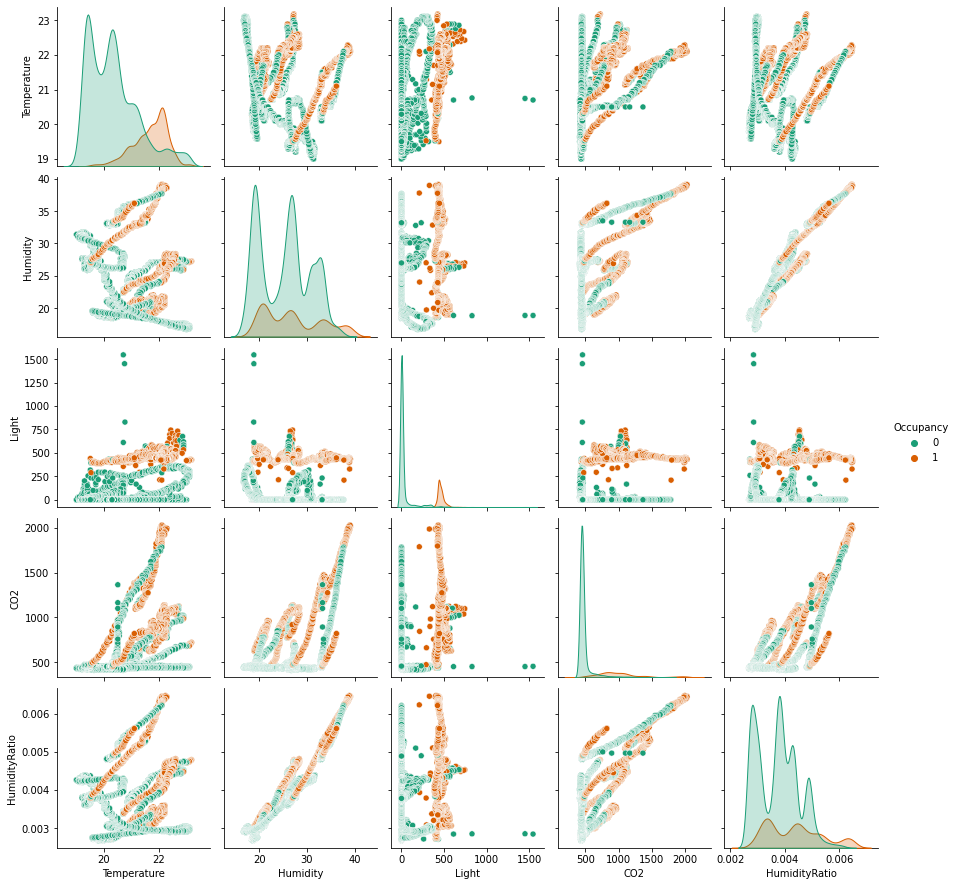

In [ ]:
sns.pairplot(df,hue='Occupancy',palette='Dark2')

In [ ]:
df.corr()['Occupancy']

Temperature      0.538220
Humidity         0.132964
Light            0.907352
CO2              0.712235
HumidityRatio    0.300282
Occupancy        1.000000
Name: Occupancy, dtype: float64

Desde el análisis de correlación, se puede concluir qué:


*   Humedad y el ratio humedad está fuertemente correlacionado
*   CO2 y humedad no entrega información
*   Temperatura junto a C02, humedad , humedad ratio no entrega información
*   Luz está altamente correlacionada con la ocupación de la sala de oficina



## 5.2 Análisis de target Vector "Occupancy": 0:NO 1:SI

---



Analizamos los 4 features para establecer parametros de comparación

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

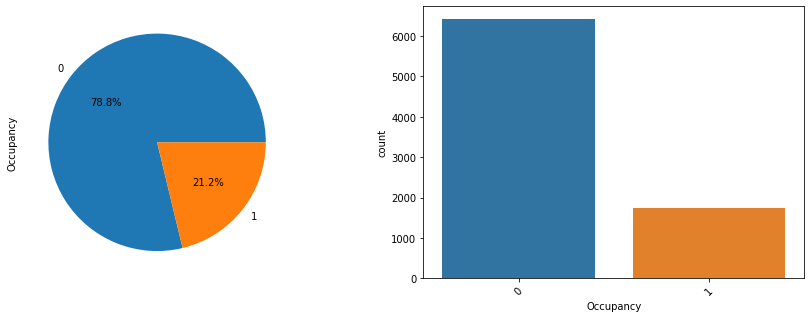

In [ ]:
df['Occupancy'].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Occupancy'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Occupancy'])
plt.xticks(rotation=45)

In [ ]:
df.Occupancy.value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

# 6 Train Test Split / GridSearchCV

Metodología de aplicación: 

1. Revisión de los modelos estudiados en clases con optimización de hiperparametros por medio de GridSearchCV

- KNN
- Random Forest
- Arbol de decisión
- Regresión logistica




In [ ]:
#Transformamos y obtenemos nuestro feature input "X" y el output o target vector de salida "y"
X = df.drop(columns = ['date','Occupancy'],axis=1)
y = df.Occupancy

In [ ]:
X.shape

(8143, 5)

In [ ]:
y.shape

(8143,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =3, stratify=y)

In [ ]:
# Estandarizar datos
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 7 Aplicación de modelos

## 7.1 KNN

In [ ]:
#Entrenamos el modelo sin ajustar hiperparametros. Por defecto, ajusta k=5
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions = knn.predict(X_train)

In [ ]:
score0 = knn.score(X_test, y_test)
score0

0.993614931237721

KNN con K óptimo a través del método del codo

In [ ]:
error_rate = []
# Encontramos el K óptimo
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

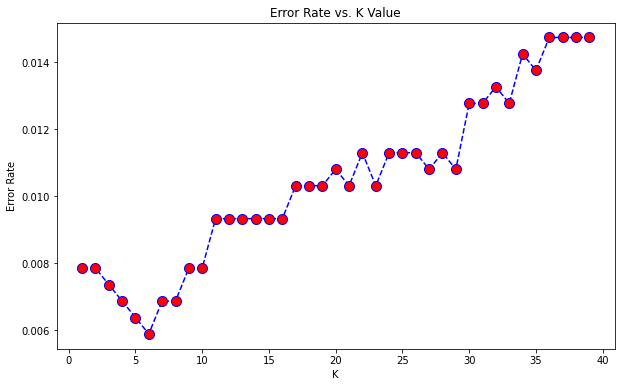

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
score = knn.score(X_test, y_test)
score

0.9941060903732809

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)

In [ ]:
print(confusion_matrix(y_test,pred))

[[1599    5]
 [   7  425]]




*   Falso positivo:1599
*   Falso negativo:5
*   Verdadero positivo:30
*   Verdadero negativo:425




In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1604
           1       0.99      0.98      0.99       432

    accuracy                           0.99      2036
   macro avg       0.99      0.99      0.99      2036
weighted avg       0.99      0.99      0.99      2036



In [ ]:
#Podemos observar que al optimizar el hiperparametro K , logra aumentar su precisión marginalmente. Sin embargo, con valor cercano a 100%

## 7.2 Random Forest

In [ ]:
#Transformamos y obtenemos nuestro feature input "X" y el output o target vector de salida "y"
X = df.drop(columns = ['date','Occupancy'],axis=1)
y = df.Occupancy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =3, stratify=y)

In [ ]:
# Estandarizar datos
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(random_state = 3)

In [ ]:

rf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(X_test,y_test)

0.9931237721021611

In [ ]:
# Revisión de parametros
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc_opt = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
rfc_opt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=3,
                                  

In [ ]:
print("Hiperparametros:",rfc_opt.best_params_)
print("Train Score:",rfc_opt.best_score_)
print("Test Score:",rfc_opt.score(X_test,y_test))

Hiperparametros: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
Train Score: 0.993940865552306
Test Score: 0.9931237721021611


In [ ]:
rfc_opt.fit(X_train,y_train)
pred2 = rfc_opt.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred2))

[[1597    7]
 [   7  425]]


In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1604
           1       0.98      0.98      0.98       432

    accuracy                           0.99      2036
   macro avg       0.99      0.99      0.99      2036
weighted avg       0.99      0.99      0.99      2036



## 7.3 Arbol de decisiones

In [ ]:
#Transformamos y obtenemos nuestro feature input "X" y el output o target vector de salida "y"
X = df.drop(columns = ['date','Occupancy'],axis=1)
y = df.Occupancy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =3, stratify=y)

In [ ]:
# Estandarizar datos
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf = DecisionTreeClassifier(random_state = 3)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [ ]:
score = clf.score(X_test, y_test)
score

0.9911591355599214

In [ ]:
#Aplicamos GridSearchCV para optimizar los hiperparametros y comparar el score test
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1,10),
              'min_samples_split': range(1,10),
              'min_samples_leaf': range(1,5) }



In [ ]:
dt_clf = GridSearchCV(estimator = clf, param_grid = param_grid, verbose=1, cv = 10, n_jobs = -1)
 
dt_clf.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   45.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=3, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                 

In [ ]:
print("Hiperparametros:",dt_clf.best_params_)
print("Train Score:",dt_clf.best_score_)
print("Test Score:",dt_clf.score(X_test,y_test))

Hiperparametros: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Train Score: 0.9939411338574227
Test Score: 0.9916502946954814


In [ ]:
dt_clf.fit(X_train,y_train)
pred3 = dt_clf.predict(X_test)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   44.2s finished


In [ ]:
print(confusion_matrix(y_test,pred3))

[[1597    7]
 [  10  422]]


In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1604
           1       0.98      0.98      0.98       432

    accuracy                           0.99      2036
   macro avg       0.99      0.99      0.99      2036
weighted avg       0.99      0.99      0.99      2036



## 7.4 Logistic Regression

In [ ]:
#Transformamos y obtenemos nuestro feature input "X" y el output o target vector de salida "y"
X = df.drop(columns = ['date','Occupancy'],axis=1)
y = df.Occupancy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =3, stratify=y)

In [ ]:
# Estandarizar datos
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Aplicamos regresion logistica seleccionando discrecionalmente los hiperparametros
lg = LogisticRegression(random_state = 3, penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
lg.fit(X_train, y_train)
print('Train Score:', lg.score(X_train, y_train))
print('Test Score:', lg.score(X_test, y_test))

Train Score: 0.9864090388079253
Test Score: 0.9847740667976425


In [ ]:
#GridSearchCV

param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}


clf = GridSearchCV(estimator = lg, param_grid=param_grid, cv =10)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l1',
                                          random_state=3, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Hiperparametros:",clf.best_params_)
print("Train Score:",clf.best_score_)
print("Test Score:",clf.score(X_test,y_test))

Hiperparametros: {'C': 0.01, 'penalty': 'l2'}
Train Score: 0.9877188698988488
Test Score: 0.9847740667976425


In [ ]:
clf.fit(X_train,y_train)
pred4 = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred4))

[[1575   29]
 [   2  430]]


In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1604
           1       0.94      1.00      0.97       432

    accuracy                           0.98      2036
   macro avg       0.97      0.99      0.98      2036
weighted avg       0.99      0.98      0.98      2036



## 7.5 Support Vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =3, stratify=y)

In [ ]:
model = SVC(random_state = 3)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=3, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Definición de rango de parametros
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, cv =10)
 
# ajuste de modelo para gridSearchCv
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print("Test Score:",grid.score(X_test,y_test))

Test Score: 0.9901768172888016


In [ ]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1604
           1       0.97      0.99      0.98       432

    accuracy                           0.99      2036
   macro avg       0.98      0.99      0.99      2036
weighted avg       0.99      0.99      0.99      2036



# 8 Conlusión

Basado en las metricas de perfomance, se selecciona la precisión general. El mejor score test resultó desde el modelo de clasificación KNN con 0.9941 (accuracy).

Los mejores indicadores, de precisión , recall , f1 y accuracy se observan desde KNN